In [2]:
import os
from os import path as op
import numpy as np
from scipy import stats
from scipy import linalg
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.spatial.distance import cdist
import vlgp
from vlgp import util, simulation

In [3]:
pip list

Package                       Version
----------------------------- --------------------
absl-py                       2.0.0
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.1
anaconda-project              0.11.1
annotated-types               0.6.0
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bash                          0.6
bcrypt                        3.2.0
beaut

In [2]:
# Set dimensions and simulation parameters
K1 = 500  # Number of observations for Group 1
K2 = 800  # Number of observations for Group 2
K = K1 + K2  # Total number of observations
D = 6  # Total latent dimensions
T = 250  # Number of time points
t = np.linspace(0, 2, T)  # Time intervals

d_s = 2  # Shared latent dimension
d_1 = 2  # Independent latent dimension for group 1
d_2 = 2  # Independent latent dimension for group 2

rho = 1.0  # Scale for GP kernel
l = 2.0  # Length scale for GP kernel
nu = 0.1  # Noise variance for observations

# Set factor loadings
A_1 = np.random.randn(K1, d_1)
A_2 = np.random.randn(K2, d_2)
A_s1 = np.random.randn(K1, d_s)
A_s2 = np.random.randn(K2, d_s)

A = np.block([[A_s1, A_1, np.zeros((K1, d_2))],
              [A_s2, np.zeros((K2, d_1)), A_2]])  # Group 2

def kernel_function(t1, t2, rho, l):
    """Squared exponential kernel."""
    dist_sq = cdist(t1.reshape(-1, 1), t2.reshape(-1, 1), metric='sqeuclidean')
    return rho * np.exp(-dist_sq / (2 * l ** 2))

K_t = kernel_function(t, t, rho, l)

z_shared = np.random.multivariate_normal(np.zeros(T), K_t, size=d_s).T
z_1 = np.random.multivariate_normal(np.zeros(T), K_t, size=d_1).T
z_2 = np.random.multivariate_normal(np.zeros(T), K_t, size=d_2).T

Z = np.hstack([z_shared, z_1, z_2])
Z

array([[ 1.0690378 ,  0.64520351, -1.9703384 ,  1.37300499,  0.56259462,
         0.48884262],
       [ 1.06581383,  0.6398957 , -1.97113622,  1.3763691 ,  0.56010839,
         0.48977062],
       [ 1.06253972,  0.63456668, -1.97191997,  1.379694  ,  0.55759699,
         0.49070747],
       ...,
       [-0.15189293, -0.63448004, -1.28259768,  0.90169561,  0.09730978,
         0.80469878],
       [-0.15434646, -0.63738086, -1.27466781,  0.89604908,  0.0988495 ,
         0.80564085],
       [-0.15676173, -0.64025753, -1.2666988 ,  0.89039654,  0.10041853,
         0.80657804]])

In [3]:
ntrial = 10  # Number of trials
nbin = 250  # Number of bins per trial to match T=250 as previously set
dim = 6  # Number latent dimensions
Z_cut = Z[:(Z.shape[0] // nbin) * nbin]
trials = [{'ID': i, 'y': Z_cut[i * nbin: (i + 1) * nbin].reshape(nbin, dim)} for i in range(Z_cut.shape[0] // nbin)]
trials

[{'ID': 0,
  'y': array([[ 1.0690378 ,  0.64520351, -1.9703384 ,  1.37300499,  0.56259462,
           0.48884262],
         [ 1.06581383,  0.6398957 , -1.97113622,  1.3763691 ,  0.56010839,
           0.48977062],
         [ 1.06253972,  0.63456668, -1.97191997,  1.379694  ,  0.55759699,
           0.49070747],
         ...,
         [-0.15189293, -0.63448004, -1.28259768,  0.90169561,  0.09730978,
           0.80469878],
         [-0.15434646, -0.63738086, -1.27466781,  0.89604908,  0.0988495 ,
           0.80564085],
         [-0.15676173, -0.64025753, -1.2666988 ,  0.89039654,  0.10041853,
           0.80657804]])}]

In [4]:
#np.random.seed(0)

fit = vlgp.fit(
    trials,  
    n_factors=3,  # dimensionality of latent process
    max_iter=20,  # maximum number of iterations
    min_iter=10  # minimum number of iterations
)

Initializing
Initialized
Fitting
Iteration    1, E-step 0.15s, M-step 0.04s
Iteration    2, E-step 0.12s, M-step 0.03s
Iteration    3, E-step 0.13s, M-step 0.03s
Iteration    4, E-step 0.12s, M-step 0.03s
Iteration    5, E-step 0.11s, M-step 0.03s
Iteration    6, E-step 0.13s, M-step 0.04s
Iteration    7, E-step 0.12s, M-step 0.03s
Iteration    8, E-step 0.12s, M-step 0.03s
Iteration    9, E-step 0.11s, M-step 0.03s
Iteration   10, E-step 0.14s, M-step 0.04s
Iteration   11, E-step 0.12s, M-step 0.03s
Iteration   12, E-step 0.12s, M-step 0.03s
Iteration   13, E-step 0.15s, M-step 0.04s
Iteration   14, E-step 0.13s, M-step 0.03s
Iteration   15, E-step 0.12s, M-step 0.03s
Iteration   16, E-step 0.12s, M-step 0.03s
Iteration   17, E-step 0.13s, M-step 0.03s
Iteration   18, E-step 0.12s, M-step 0.03s
Iteration   19, E-step 0.13s, M-step 0.03s
Iteration   20, E-step 0.13s, M-step 0.03s
Inferring
0.13s
Done


In [5]:
fit

{'trials': [{'ID': 0,
   'y': array([[ 1.0690378 ,  0.64520351, -1.9703384 ,  1.37300499,  0.56259462,
            0.48884262],
          [ 1.06581383,  0.6398957 , -1.97113622,  1.3763691 ,  0.56010839,
            0.48977062],
          [ 1.06253972,  0.63456668, -1.97191997,  1.379694  ,  0.55759699,
            0.49070747],
          ...,
          [-0.15189293, -0.63448004, -1.28259768,  0.90169561,  0.09730978,
            0.80469878],
          [-0.15434646, -0.63738086, -1.27466781,  0.89604908,  0.0988495 ,
            0.80564085],
          [-0.15676173, -0.64025753, -1.2666988 ,  0.89039654,  0.10041853,
            0.80657804]]),
   'mu': array([[ 2.90439525e+41, -6.29143126e+40, -1.77381554e+39],
          [ 3.38079155e+41, -9.40954813e+40, -1.65541627e+39],
          [ 3.85324958e+41, -1.23180445e+41, -1.53631214e+39],
          [ 4.32106671e+41, -1.51977938e+41, -1.41497282e+39],
          [ 4.75320770e+41, -1.78769378e+41, -1.29330377e+39],
          [ 5.14348497e+41, -

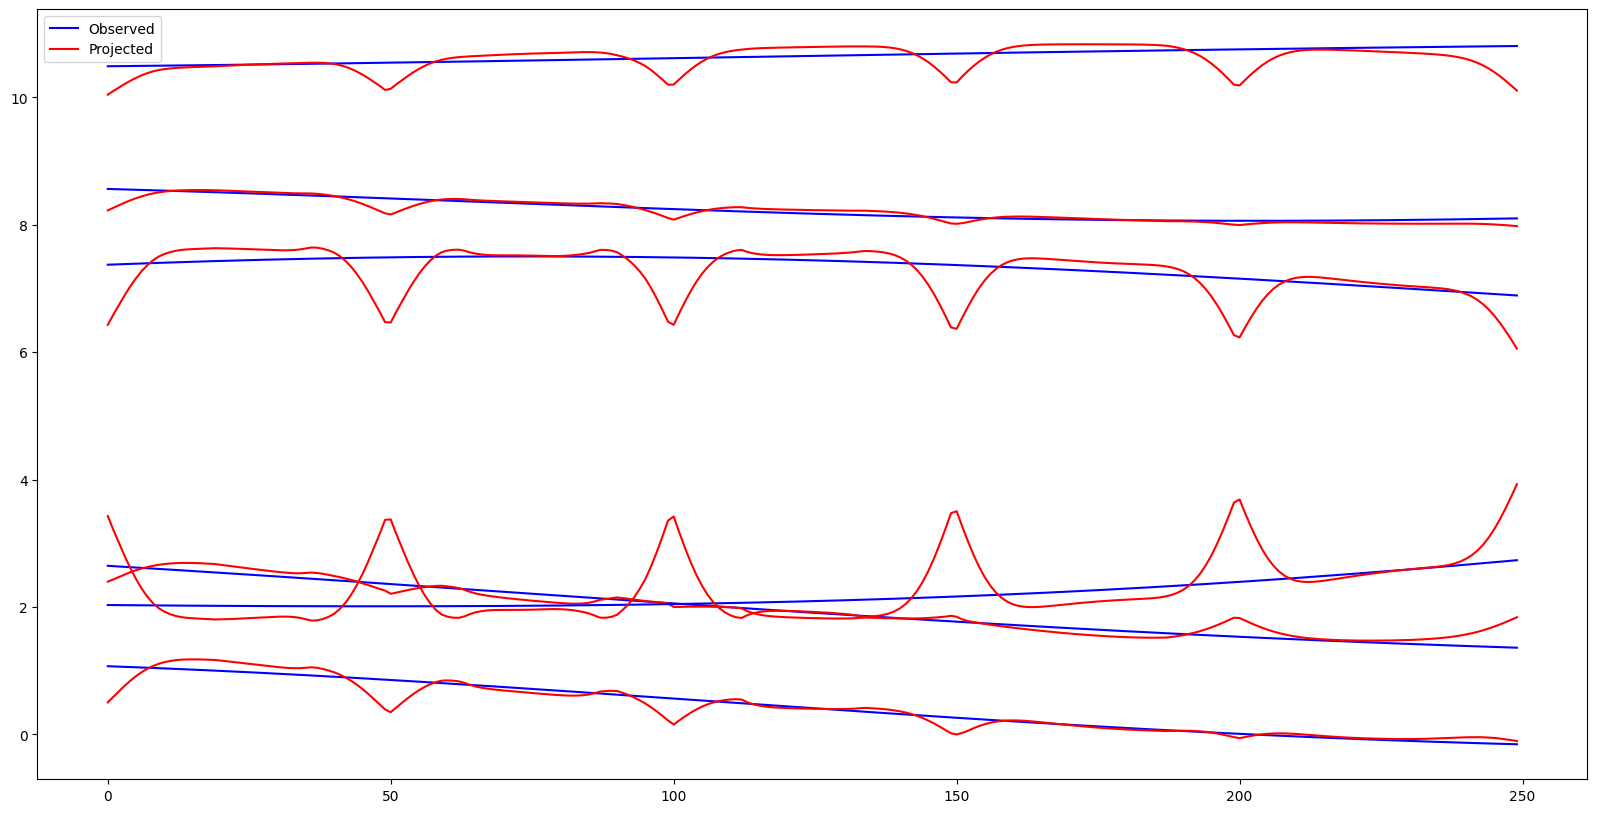

In [6]:
trials = fit['trials']  # extract trials
for i in range(len(trials)):
    trial = trials[i]
    x = trial['y']  # observed data
    mu = trial['mu']  # posterior latent

    # Calculate the projection matrix from latent space to observed space
    W, _, _, _ = np.linalg.lstsq(mu, x, rcond=None)
    mu_proj = mu @ W 
    
    # Plotting
    plt.figure(figsize=(20, 10))
    for j in range(x.shape[1]):
        offset = 2 * j
        plt.plot(x[:, j] + offset, 'b', label='Observed' if j == 0 else "")
        plt.plot(mu_proj[:, j] + offset, 'r', label='Projected' if j == 0 else "")
    plt.legend()
    plt.show()
    plt.close()


In [7]:
trials = fit['trials']  # extract trials
rmses = [] 

for i, trial in enumerate(trials):
    x = trial['y']  # observed data
    mu = trial['mu']  # posterior latent

    # Calculate the projection matrix from latent space to observed space
    W, _, _, _ = np.linalg.lstsq(mu, x, rcond=None)
    mu_proj = mu @ W  
    
    # Calculate RMSE
    rmse = np.sqrt(np.mean((x - mu_proj) ** 2))
    rmses.append(rmse)

rmses

[0.24744462294372013]

In [8]:
# Correlation Coefficients
def calculate_correlation(cor, pred):
    correlation_matrix = np.corrcoef(cor.T, pred.T)
    num_variables = cor.shape[1]
    return np.diag(correlation_matrix[num_variables:, :num_variables])

correlations = [calculate_correlation(trial['y'], mu @ W) for trial in trials]
correlations


[array([0.94845293, 0.96151449, 0.50256064, 0.50912492, 0.91768311,
        0.3731381 ])]

In [9]:
kTrial = 0;
trial = fit['trials'][kTrial]

In [10]:
samples = vlgp.sample_posterior(trial, fit['params'], 10, reg=1e-6)

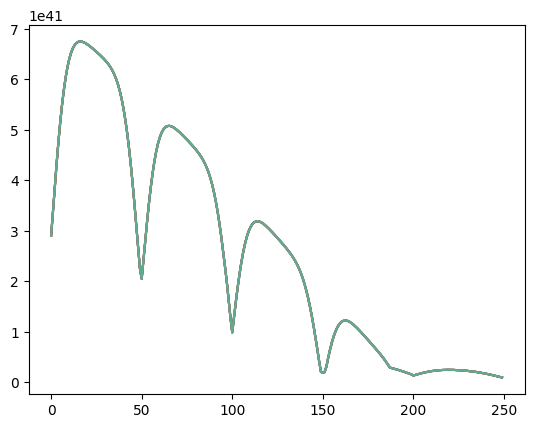

In [11]:
plt.figure()
mu = trial['mu']
v = trial['v'] # marginal variance
s = np.sqrt(v)
kFactor = 0
plt.fill_between(np.arange(mu.shape[0]), mu[:,kFactor]-2*s[:,kFactor], mu[:,kFactor]+2*s[:,kFactor], color=[.8,.8,.8], alpha=0.5)
plt.plot(mu[:,kFactor], 'k')
plt.plot(samples[:,:,kFactor].T, alpha=0.5);

In [12]:
# Z Z.transpose

In [13]:
# ask how important it is to use this model
# check how well it really does and if its worth it
# look at reconstruction error (rmse) and prediction error
# cross validated likelihood
# r squared and correlation (might be weird)
# eval model if using gauss isntead of poiss
# was gp even worth doing
# ask and explore answer to these questions
# how much of an improvement does each part of the model make to the complete model
# make sure to make fair comparisons (same latents, same vars, etc)
# benchmarking the model and justifying its use